In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df  = pd.read_csv("train.csv")
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [44]:
df.shape  

(381109, 12)

In [45]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [46]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [48]:
df.isnull().sum().sum()

0

In [49]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [50]:
df=df.drop("id",axis=1)

In [51]:
for i in ['Driving_License','Previously_Insured', 
          'Vehicle_Age', 'Vehicle_Damage','Response']:
    print(i)
    print(df[i].value_counts())

Driving_License
1    380297
0       812
Name: Driving_License, dtype: int64
Previously_Insured
0    206481
1    174628
Name: Previously_Insured, dtype: int64
Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64
Vehicle_Damage
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64
Response
0    334399
1     46710
Name: Response, dtype: int64


In [52]:
df['Driving_License']=df['Driving_License'].astype('object')
df['Previously_Insured']=df['Previously_Insured'].astype('object')
df['Response']=df['Response'].astype('object')

# Data Cleaning

In [53]:
def clean_data(df):
    """to clean the data pass the dataframe itself """
    print("Columns with all null values are")
    print(df.columns[df.isnull().all()])
    
    # Drop columns which have all NaN values
    c=df.columns[df.isnull().all()]
    df.drop(c, inplace=True, axis=1)
    
    # Drop Columns which have more than 90% NAs
    df.dropna(axis=1, thresh=int(0.1 * df.shape[0]),inplace=True)
    
    # Find rows with missing values greater than 50%
    print(df.isnull().sum(axis=1))
    # Drop rows with missing values greater than 50%
    df = df[df.isnull().sum(axis=1) <=(df.shape[1] * 0.5) ]
    
    return df
    
    

In [54]:
clean_data(df)

Columns with all null values are
Index([], dtype='object')
0         0
1         0
2         0
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Length: 381109, dtype: int64


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


# Fill data

In [55]:
df_num=df.select_dtypes(exclude='object')
df_cat=df.select_dtypes(include='object')

df_num.columns , df_cat.columns

(Index(['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel',
        'Vintage'],
       dtype='object'),
 Index(['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
        'Vehicle_Damage', 'Response'],
       dtype='object'))

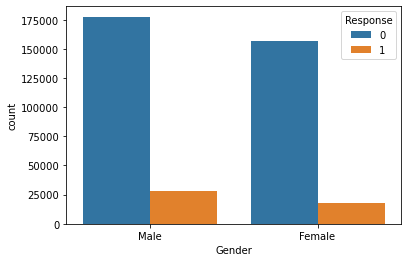

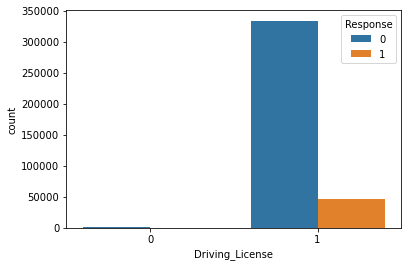

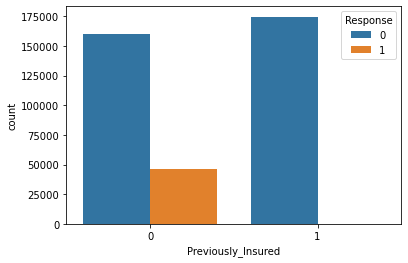

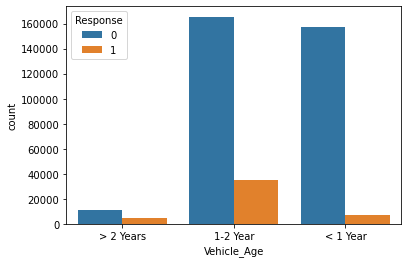

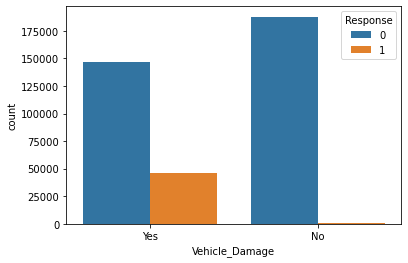

In [15]:
for i in df_cat.columns[0:-1]:
    sns.countplot(x=df_cat[i],hue=df_cat['Response'])
    plt.show()

### Conclusion-

1.Slightly more number of male are interested in having vehicle insurance as compare to female.

2.Those, who do not have driving license are not interested in vehicle insurance.

3.There are people who already have vehicle insurance , they are not interested in it.

4.There are more number of people whose vehicle age is between 1 to 2 years and interested in vehicle insurance.
   out of all the people who are interested in vehicle insurance, almost all of them have the history of vehicle damage.

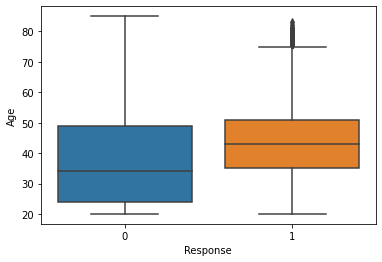

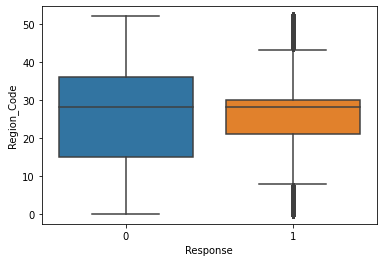

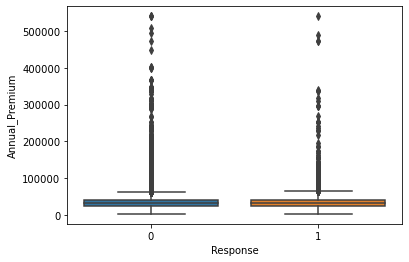

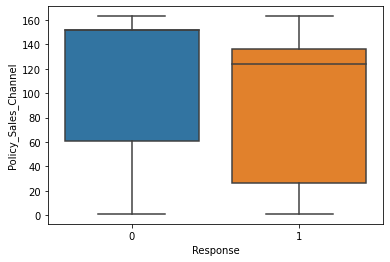

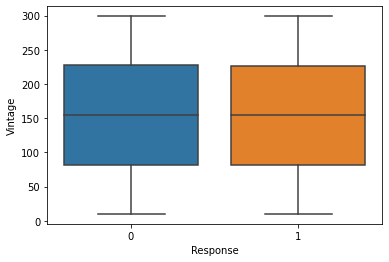

In [16]:
for i in df_num.columns:
    sns.boxplot(x=df_cat['Response'],y=df_num[i])
    plt.show()

1.Mean age is higher for those who are interested in vehicle insurance as compare to who are not.

2.Mean Regional code is same for both response.

3.Mean annual income is same for both response.

4.Mean policy channels are different for both response.

5.Mean vintage days are same for both response.

C:\Users\archa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


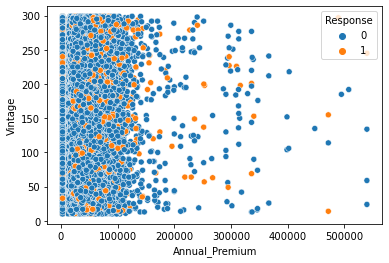

In [17]:
sns.scatterplot(x=df_num['Annual_Premium'],y=df_num['Vintage'],hue=df_cat['Response'])
plt.show()

##### There is no relationship between vintage days of customer and annual premium. 
##### There are very few people who are paying very high premium and the people who are interested in vehicle insurance, there annual premium are low.

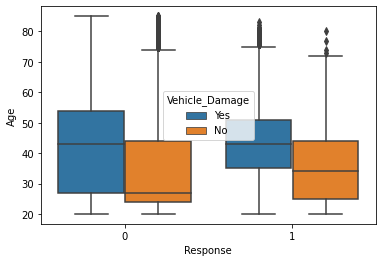

In [18]:
sns.boxplot(y=df_num['Age'],hue=df_cat['Vehicle_Damage'],x=df_cat['Response'])
plt.show()

The mean age of the customer is high who have the history of vehicle damage irrespective of their response for vehicle insurance.

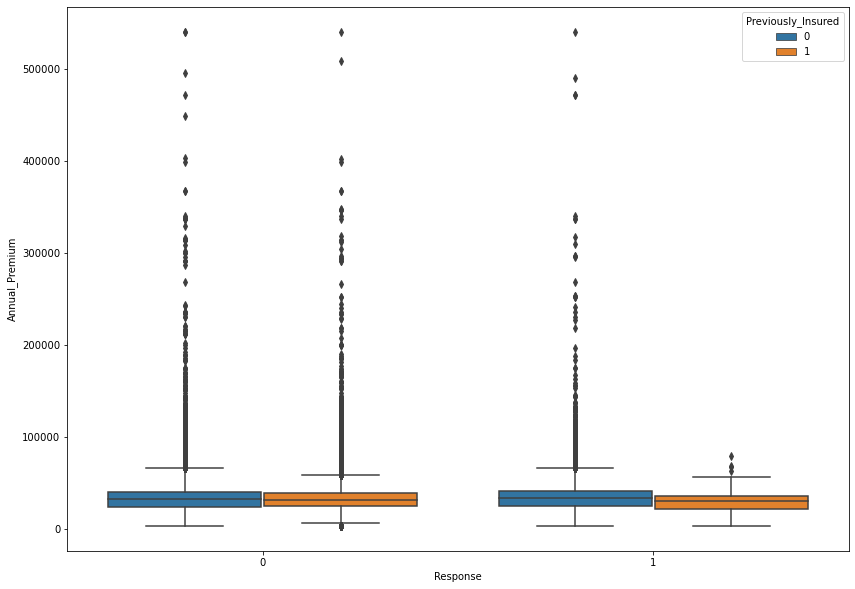

In [19]:
plt.figure(figsize=[14,10])
sns.boxplot(x=df_cat['Response'],y=df_num['Annual_Premium'],hue=df_cat['Previously_Insured'])
plt.show()

###### If we want to compare the annual premium with previously insured and their response then we can observe that mean annnual premium is high for those who do not have previous insurance and we can observe that there are customer who already have insurance and they are still interesed in it. 

###### Mean annual premium is same for those people who are not interested in vehicle response irrespective of the status of their previous insurance.

In [20]:
from sklearn.impute import KNNImputer
def fill_numeric_data(df,neighbors = 2):
    """ provide dataframe and neighbors , by default it is 2 """
    imputer = KNNImputer(n_neighbors=neighbors, weights="uniform")
    cols = df.columns
    filled_array = imputer.fit_transform(df)
    df_filled = pd.DataFrame(filled_array, columns = cols)
    return df_filled

In [21]:
fill_numeric_data(df_num)

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
0,44.0,28.0,40454.0,26.0,217.0
1,76.0,3.0,33536.0,26.0,183.0
2,47.0,28.0,38294.0,26.0,27.0
3,21.0,11.0,28619.0,152.0,203.0
4,29.0,41.0,27496.0,152.0,39.0
...,...,...,...,...,...
381104,74.0,26.0,30170.0,26.0,88.0
381105,30.0,37.0,40016.0,152.0,131.0
381106,21.0,30.0,35118.0,160.0,161.0
381107,68.0,14.0,44617.0,124.0,74.0


## Statistical Test

Perfom some statistical test and observe some evidence to drop the columns which are not required.

In [22]:
from scipy.stats import stats

In [23]:
def stat_test(df,df_num):
    for i in df_num.columns:
        df_1=df[df['Response']==1][i]
        df_0=df[df['Response']==0][i]
        print(i)
        tsats,pval=stats.ttest_ind(df_1,df_0)
        print(pval)
        tstas,pval=stats.mannwhitneyu(df_1,df_0)
        print(pval)

In [24]:
stat_test(df,df_num)

Age
0.0
0.0
Region_Code
6.783916512057903e-11
0.22909579533424512
Annual_Premium
3.7223151414267487e-44
4.570648777804621e-98
Policy_Sales_Channel
0.0
0.0
Vintage
0.5167036521412091
0.2581504947885175


##### As we can see that vintage column is passing both the test so if we take the significance level of 5% the for vintage column we fail to reject h0 which means mean value of vintage days are same hence we can drop the column.


##### We can drop the columns like regional code and policy sales channel as it will not have any effect on the response of the customer beacause thease values are just the way of communications.

In [56]:
df_num=df_num.drop(['Vintage','Policy_Sales_Channel','Region_Code'],axis=1)

In [57]:
df_cat.columns , df_num.columns

(Index(['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
        'Vehicle_Damage', 'Response'],
       dtype='object'),
 Index(['Age', 'Annual_Premium'], dtype='object'))

# Normalization

In [58]:
from sklearn.preprocessing import PowerTransformer
"""def normalize_num_data(df_num):
    pt=PowerTransformer()
    df_num_pt=pt.fit_transform(df_num)
    df_num_pt=pd.DataFrame(df_num_pt)
    df_num_pt.columns=df_num.columns
    return df_num_pt """
def encode_cat_data(df_cat):    
    df_cat=df_cat.drop('Response',axis=1)
    df_cat_dum=pd.get_dummies(df_cat,columns=list(df_cat.columns),drop_first=True)
    return df_cat_dum

In [28]:
normalize_num_data(df_num).head()

,Age,Annual_Premium
0,0.571865,0.612207
1,1.765186,0.243028
2,0.728579,0.498644
3,-1.452684,-0.030214
4,-0.506661,-0.094107


In [59]:
encode_cat_data(df_cat).head()

,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,0,0,1,1
1,1,1,0,0,0,0
2,1,1,0,0,1,1
3,1,1,1,1,0,0
4,0,1,1,1,0,0


In [60]:
df1 = pd.concat([encode_cat_data(df_cat),normalize_num_data(df_num)],axis=1)

In [61]:
df1['Response'] = df['Response']

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

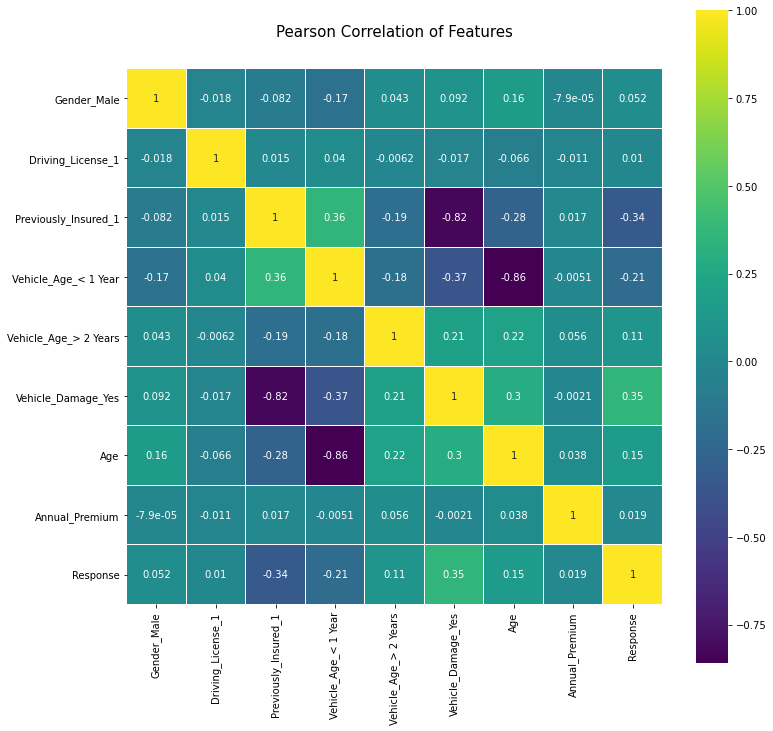

In [62]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df1.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [63]:
X=pd.concat([encode_cat_data(df_cat),normalize_num_data(df_num)],axis=1)
y=df['Response']

# Multicollinearity

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['feature']=X.columns
vif.sort_values('VIF',ascending=False)
#Multicollinearity is in acceptable range.

C:\Users\archa\AppData\Roaming\Python\Python38\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


,VIF,feature
1,15.600713,Driving_License_1
3,7.102841,Vehicle_Age_< 1 Year
5,6.324923,Vehicle_Damage_Yes
2,5.720264,Previously_Insured_1
6,3.847655,Age
0,2.236319,Gender_Male
4,1.127178,Vehicle_Age_> 2 Years
7,1.007586,Annual_Premium


In [35]:
y.value_counts() #There is a huge data imbalance so we will have to treat that.

0    334399
1     46710
Name: Response, dtype: int64

# Data Imbalance Treatment using smote NC

In [64]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC

In [65]:
def balance_data(X,y):
    y=y.astype('int64')
    xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,stratify=y)
    smotenc = SMOTENC([0,1,2,3,4,5])
    X_oversample,y_oversample = smotenc.fit_resample(xtrain,ytrain)
    print(y_oversample.value_counts())
    
    return X_oversample,y_oversample,xtest,ytest
    

In [66]:
X_oversample,y_oversample,xtest,ytest = balance_data(X,y)

1    234079
0    234079
Name: Response, dtype: int64


In [67]:
xtest

,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Age,Annual_Premium
119158,1,1,1,1,0,1,-1.049089,0.670792
91278,1,1,1,0,0,0,0.275663,0.398476
198193,0,1,1,0,0,0,1.510501,0.361182
307304,0,1,1,0,0,1,0.917626,-1.804717
257563,1,1,0,0,0,1,0.872296,0.357147
...,...,...,...,...,...,...,...,...
277180,0,1,1,0,0,0,1.479327,-0.528115
120661,1,1,1,1,0,0,-1.310091,0.077747
338185,1,1,0,1,0,0,-1.175827,0.040894
166474,1,1,0,1,0,0,-1.049089,-0.140109


# Model Building

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score , classification_report , confusion_matrix , plot_roc_curve , f1_score
from sklearn.metrics import precision_recall_fscore_support as score

In [41]:
def model_test(X_oversample,y_oversample,xtest,ytest,choice = 1):
    if choice == 1:
        from sklearn.linear_model import LogisticRegression
        #from sklearn.model_selection import KFold,cross_val_score
        log=LogisticRegression()
        log.fit(X_oversample,y_oversample)
        ypred=log.predict(xtest)
        #CLASSIFICATION REPORT
        print(classification_report(ytest,ypred))
        
        precision,recall,fscore,support=score(ytest,ypred)   # ,average='macro'
        print('Precision : {}'.format(precision))
        print('Recall    : {}'.format(recall))
        print('F-score   : {}'.format(fscore))
        print('Support   : {}'.format(support))
        #ROC CURVE
        plot_roc_curve(log , xtest , ytest)
        plt.show()
        
        #CONFUSION MATRIX
        df_confusion = confusion_matrix(ytest, ypred)
        df_confusion
        
        plt.rcParams['figure.figsize'] = (10, 6) 
        cmap = sns.cubehelix_palette(15, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
        sns.heatmap(df_confusion,cmap = cmap,xticklabels=['Prediction 0','Prediction 1'],yticklabels=['Actual 0','Actual 1'], annot=True,fmt='d')
        f1 = f1_score(ytest,ypred,labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
        print(f1)
        
    elif choice == 2:
        from sklearn.naive_bayes import GaussianNB
        from sklearn.model_selection import KFold,cross_val_score
        NB = GaussianNB()
        NB.fit(X_oversample,y_oversample)
        ypred=NB.predict(xtest)
        #CLASSIFICATION REPORT
        print(classification_report(ytest,ypred))
        #ROC CURVE
        plot_roc_curve(NB , xtest , ytest)
        plt.show()
        
    elif choice == 3:
        from sklearn.neighbors import KNeighborsClassifier
        KNN = KNeighborsClassifier()
        KNN.fit(X_oversample,y_oversample)
        ypred=KNN.predict(xtest)
        print(classification_report(ytest,ypred))
        plot_roc_curve(KNN , xtest , ytest)
        plt.show()
        
    elif choice == 4:
        from sklearn.ensemble import GradientBoostingClassifier
        GBoost=GradientBoostingClassifier(n_estimators=100)
        GBoost.fit(X_oversample,y_oversample)
        ypred=GBoost.predict(xtest)
        print(classification_report(ytest,ypred))
        plot_roc_curve(GBoost , xtest , ytest)
        plt.show()

    

              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100320
           1       0.25      0.97      0.40     14013

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333

Precision : [0.99369249 0.24991294]
Recall    : [0.59203549 0.97309641]
F-score   : [0.74199513 0.39769015]
Support   : [100320  14013]


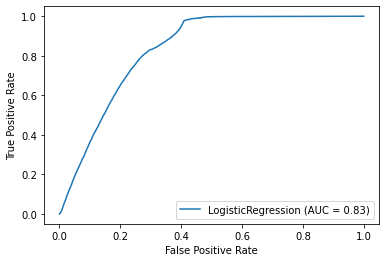

0.397690153989734


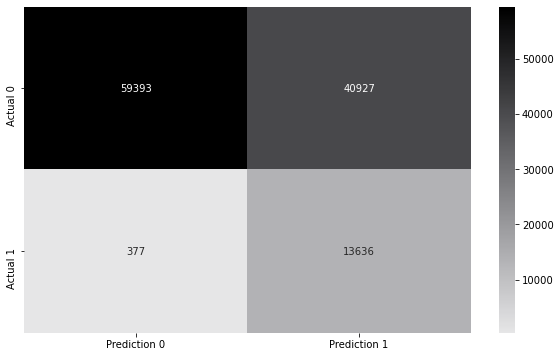

In [42]:
model_test(X_oversample,y_oversample,xtest,ytest,choice = 1)